### **Рабочая тетрадь №4**

1.1.1 Пример
Задача:
Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

0.9999999999999999 -0.9499999999999997


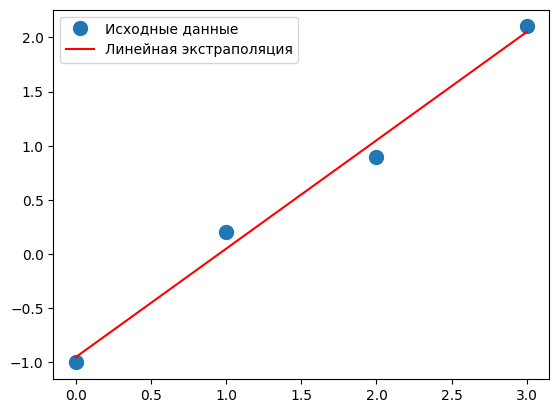

In [2]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
display(A)

m,c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m,c)

import matplotlib.pyplot as plt
plt.plot(x,y,'o', label = 'Исходные данные', markersize = 10)
plt.plot(x,m * x + c,'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2 Пример
Задача:
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

[-4.72402383 -4.44231928 -2.91344556 -1.57939484 -1.40920688  0.25595627
  0.81571498  1.52372979  3.01954465  4.45910968  4.63079723]
[24.52874629 16.32253555  8.93290423  4.2058892   0.79499502 -0.17280665
  1.12146543  3.93424669  8.67709735 16.44267628 25.43413923]


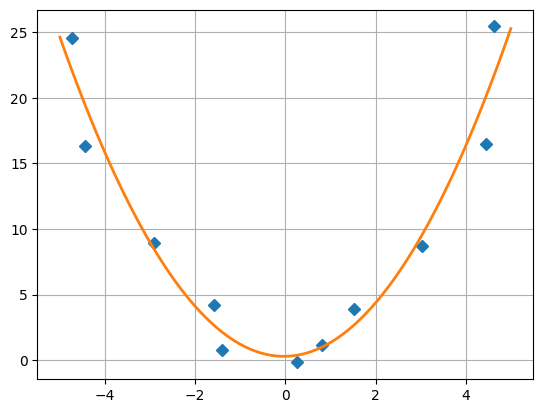

In [3]:
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5, 5, 11)
y = x**2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

#записывание данных в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep = '\n')
y = fromfile('y_data.txt', float, sep = '\n')

print(x)
print(y)

# Нахождение коэффициентов функции Вида у = ax^2 + bx + с методом наименьших квадратов # задаем вектор m = [x**2, x, E]
m = vstack((x**2, x, ones (11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt. plot(x, y, 'D')
# рисуем кривую вида у = ax^2 + bx + с, подставляя из решения коэффициенты 5[0], 5[1], 5[2]
plt. plot(x_prec, s[0]* x_prec**2 + s[1] * x_prec+s[2], '-', lw = 2)
plt.grid()
plt. savefig('парабола.png')

1.1.3 Пример
Задача:
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

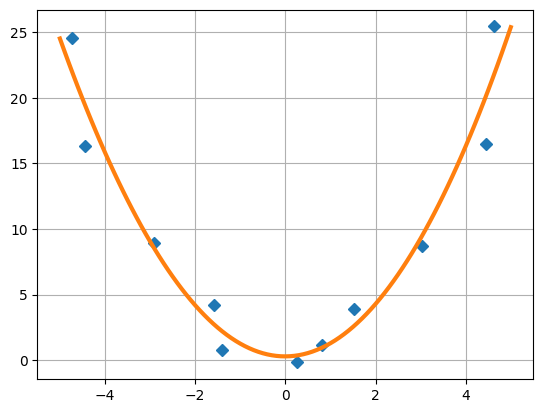

In [4]:
#Решение
# Нахождение коэффициентов функции вида у = ах^3 + bx^2 + сх + d методом наименьших квадратов # задаем вектор m = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5,5)
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида у = ах^3 + bx^2 + cx + d, подставляя из решения коэффициенты 5[0], 5[1], 5[2], 5[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

Задание:
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

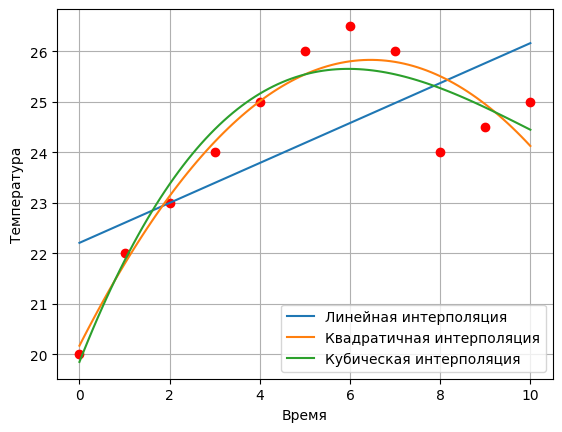

In [6]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt

time = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
temperature = array([20, 22, 23, 24, 25, 26, 26.5, 26, 24, 24.5, 25])

# Полином первой степени
m = vstack([time, ones(len(time))]).T
s = np.linalg.lstsq(m, temperature, rcond=None)[0]

time_prec = linspace(0, 10, 101)
plt.plot(time, temperature, 'ro') # точки данных
plt.plot(time_prec, s[0]*time_prec + s[1], '-', label='Линейная интерполяция') # линейная интерполяция

# Полином второй степени
m = vstack([time**2, time, ones(len(time))]).T
s = np.linalg.lstsq(m, temperature, rcond=None)[0]

plt.plot(time_prec, s[0]*time_prec**2 + s[1]*time_prec + s[2], '-', label='Квадратичная интерполяция') # квадратичная интерполяция

# Полином третей степни
m = vstack([time**3, time**2, time, ones(len(time))]).T
s = np.linalg.lstsq(m, temperature, rcond=None)[0]

plt.plot(time_prec, s[0]*time_prec**3 + s[1]*time_prec**2 + s[2]*time_prec + s[3], '-', label='Кубическая интерполяция') # кубическая интерполяция

plt.legend()
plt.xlabel('Время')
plt.ylabel('Температура')
plt.grid()
plt.savefig('Интерполяция температуры.png')

1.1.4 Пример
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥2)

array([0.25099433, 0.76473323, 0.50888048])

0.00021858008457177584
0.11433346192058166


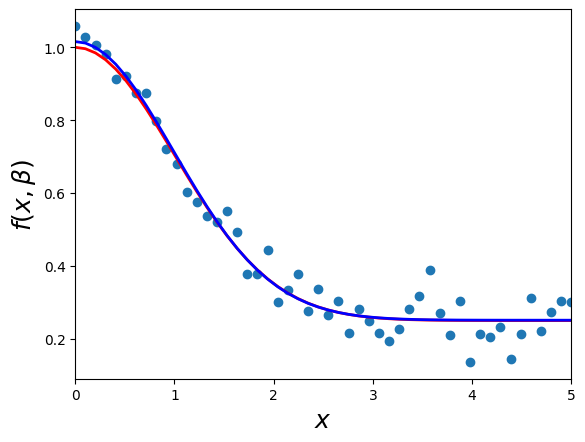

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.05872602 1.02947132 1.00598873 0.98282919 0.91222607 0.92004247
 0.87417601 0.87481527 0.79648351 0.72017859 0.67958578 0.60236825
 0.5751123  0.53629638 0.52117956 0.55017101 0.49253578 0.37819856
 0.37706848 0.44331487 0.30131025 0.33437684 0.37835522 0.27603724
 0.33744152 0.26448681 0.30382078 0.21703815 0.28298767 0.24984228
 0.2162171  0.19496724 0.22627479 0.28228813 0.3167981  0.38950306
 0.27022955 0.21107719 0.30480364 0.13

In [10]:
#добавим шума в данные, сделанные по функции f(x,b) с коэффициентами
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0 + b1 * np.exp(-b2 * x**2)
#зададим массив точек xi
xdata = np.linspace(0,5,50)
#создаем теоретически правильные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

#используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata) #была ошибка sp.optimize.curve_fit
display(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

print(xdata)
print(ydata)

1.1.5 Пример
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥𝑏1

[0.24487676 0.74918425]
0.00011445122014138175
0.10063814150774641


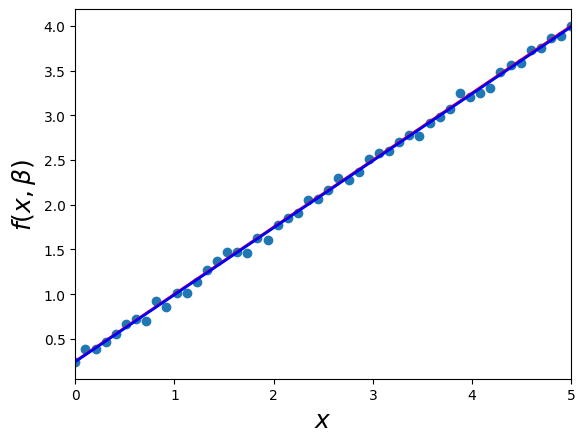

[0.25297018 0.75514513 0.49857064]
0.00014956678916189803
0.12472304947925783


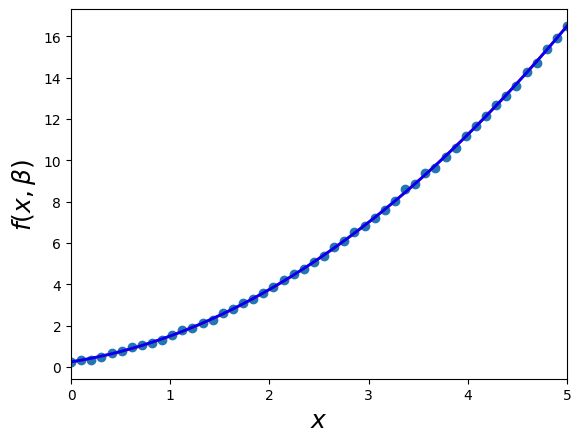

[1.021564   1.98006158]
4.577141816638014e-05
0.1058437260606559


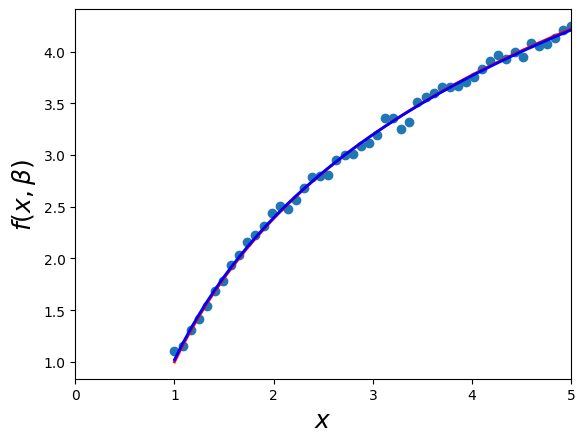

[1.00360862 1.99771334]
4.184885989035255e-06
0.09834493687230729


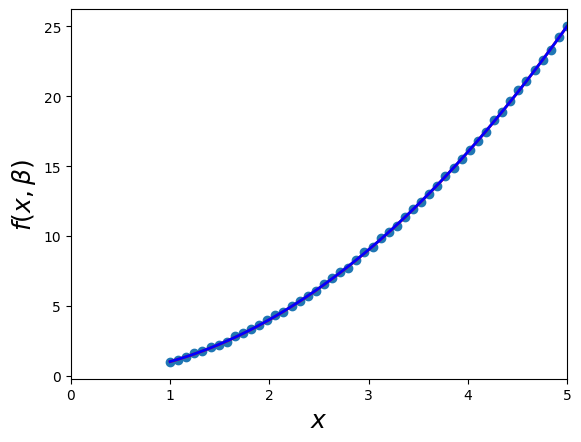

In [11]:
#решение 1
beta = (0.25, 0.75)
def f(x, b0, b1):
  return b0 + b1 * x

#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создаем теоретически правильные значения yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f (x, \beta)$", fontsize = 18)
plt.show()

#решение 2
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0 + b1 * x + b2 * x * x

#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создаем теоретически правильные значения yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f (x, \beta)$", fontsize = 18)
plt.show()

#решение 3
beta = (1, 2)
def f(x, b0, b1):
  return b0 + b1 * np.log(x)

#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#создаем теоретически правильные значения yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f (x, \beta)$", fontsize = 18)
plt.show()

#решение 4
beta = (1, 2)
def f(x, b0, b1):
  return b0 * x ** b1

#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#создаем теоретически правильные значения yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f (x, \beta)$", fontsize = 18)
plt.show()

Задание:
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

[ 4.02698723 11.99285912]
0.00014137842072310295
0.1243155071226824


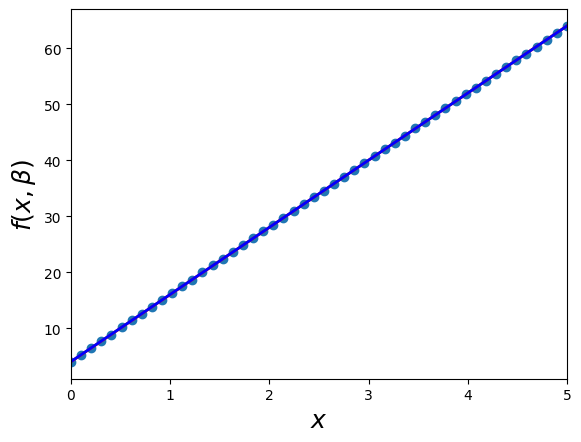

[-1.98655367  0.69092661  4.00084286]
0.00013032499985384324
0.10867739917746089


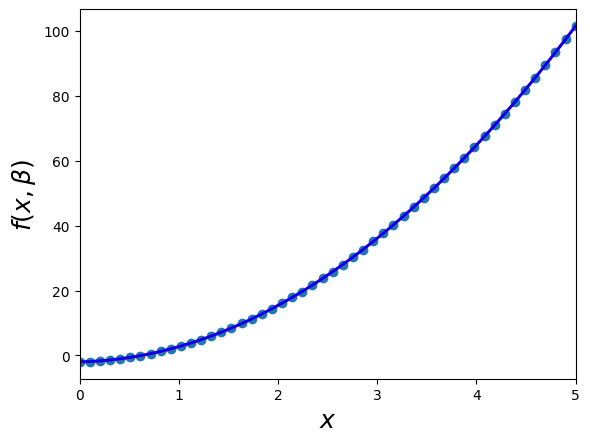

[2.00392476 1.99250521]
4.793393187200968e-05
0.11084440645059163


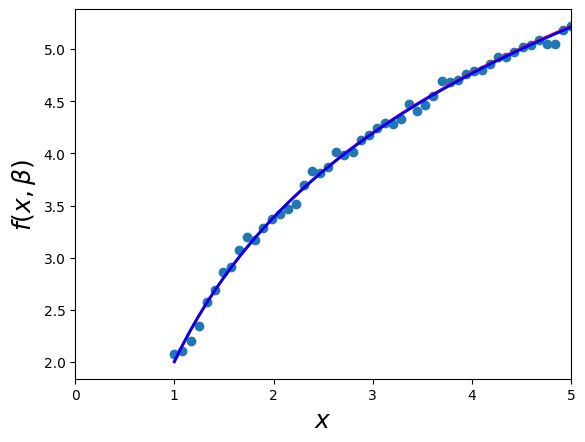

[-2.00004482  2.00014343]
1.9922682847874375e-05
0.10859411099859849


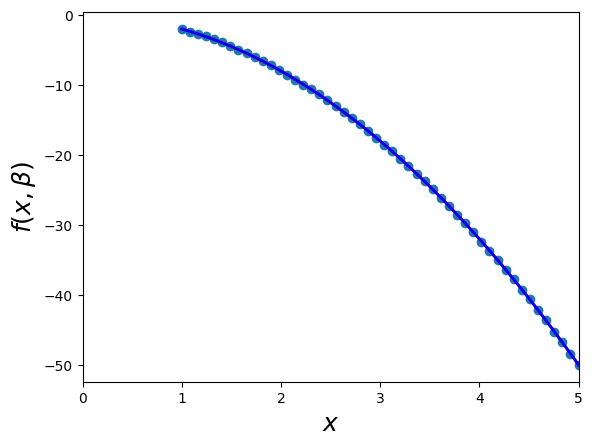

In [20]:
#решение 1
beta = (4, 12)
def f(x, b0, b1):
  return b0 + b1 * x

#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создаем теоретически правильные значения yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f (x, \beta)$", fontsize = 18)
plt.show()

#решение 2
beta = (-2, 0.7, 4)
def f(x, b0, b1, b2):
  return b0 + b1 * x + b2 * x * x

#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создаем теоретически правильные значения yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f (x, \beta)$", fontsize = 18)
plt.show()

#решение 3
beta = (2, 2)
def f(x, b0, b1):
  return b0 + b1 * np.log(x)

#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#создаем теоретически правильные значения yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f (x, \beta)$", fontsize = 18)
plt.show()

#решение 4
beta = (-2, 2)
def f(x, b0, b1):
  return b0 * x ** b1

#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#создаем теоретически правильные значения yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f (x, \beta)$", fontsize = 18)
plt.show()

1.2.1 Пример
Задача:
Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn

   учебное время  оценка
0           0.50      10
1           0.75      22
2           1.00      13
3           1.25      43
4           1.50      20
(20, 2)
       учебное время     оценка
count      20.000000  20.000000
mean        2.887500  53.700000
std         1.501041  26.435821
min         0.500000  10.000000
25%         1.687500  30.250000
50%         2.875000  58.500000
75%         4.062500  75.250000
max         5.500000  93.000000


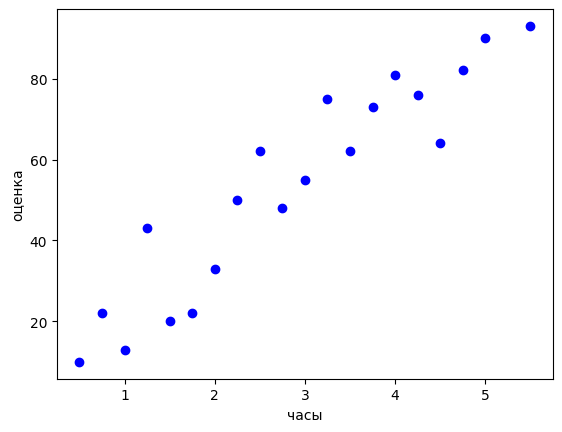

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {"учебное время": [0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.50],
           "оценка": [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
dataset = pd.DataFrame(my_dict)
print(dataset.head())

print(dataset.shape)
print(dataset.describe())

plt.scatter(dataset["учебное время"],dataset["оценка"],color="b",label="данные экзамена")
plt.xlabel("часы")
plt.ylabel("оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [22]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
3.168632075471699
[17.18867925]


Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:

,Actual,Predicted
0,90,89.112028
1,22,16.060142
2,93,97.706368
3,62,46.140330


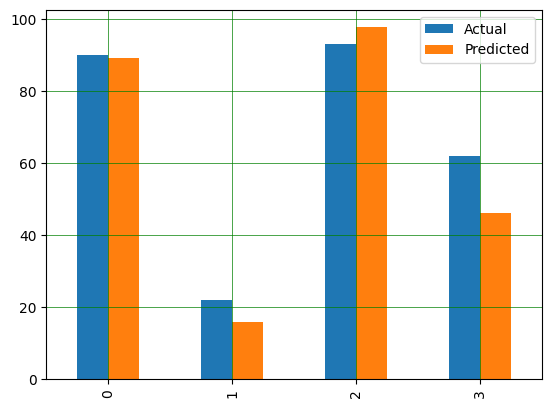

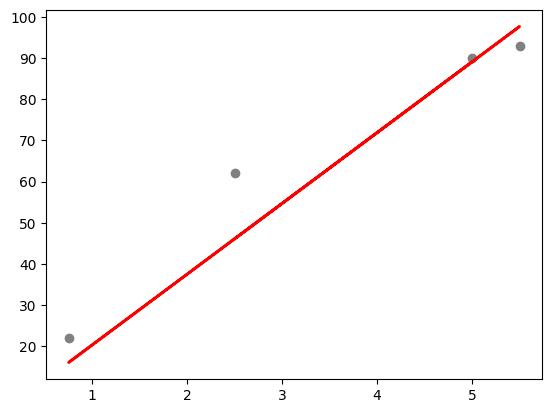

In [23]:
y_pred = regressor.predict(x_test)

df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
display(df)

df.plot(kind = 'bar')
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, y_pred, color = 'red', linewidth = 2)
plt.show()

Задание:
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

Коэффициент наклона: 9312.575126729189
Свободный член: 26780.09915062818


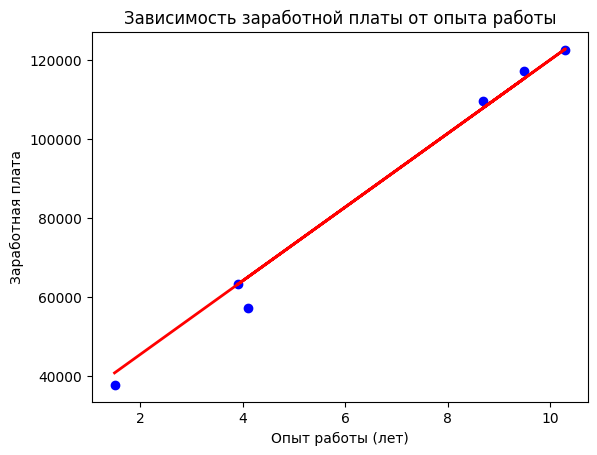

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Загрузка данных
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
data = pd.read_csv(url)

# Разделение данных на признаки (опыт работы) и целевую переменную (заработная плата)
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Получение коэффициентов
slope = model.coef_[0]
intercept = model.intercept_

print('Коэффициент наклона:', slope)
print('Свободный член:', intercept)

# Построение прогноза
y_pred = model.predict(X_test)

# Визуализация результата
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Опыт работы (лет)')
plt.ylabel('Заработная плата')
plt.title('Зависимость заработной платы от опыта работы')
plt.show()

1.3.1 Пример
Задача:
Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

In [25]:
import numpy as np

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
X = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8,7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]
X = np.transpose(X)
Х = np.c_[X, np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[0.2278716  0.36423044 0.03346137]


1.3.2 Пример
Задача:
Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

In [26]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
X = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y, columns=['y'])
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X, columns=['x1', 'x2', 'x3'])
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'х3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
print(dataset.head())

# изучим данные
print(dataset.shape)
print(dataset.describe())

# разделим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']
# разделим данные на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
#Выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
display(coeff_df)
#Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
display(df)
#Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))

   y  x1  x2  x3
0  1   0   4   4
1  2   2   1   1
2  3   4   2   2
3  4   1   3   5
4  3   5   4   6
(23, 4)
               y         x1         x2         x3
count  23.000000  23.000000  23.000000  23.000000
mean    3.565217   5.347826   5.521739   5.043478
std     1.674029   2.404706   2.428422   2.704849
min     0.000000   0.000000   1.000000   1.000000
25%     3.000000   4.500000   4.000000   3.000000
50%     4.000000   5.000000   6.000000   5.000000
75%     5.000000   6.500000   7.500000   7.000000
max     6.000000   9.000000   9.000000   9.000000


,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


Mean Squared Error: 1.3272699242343076


Задание
Задача:
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Загрузка данных
url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
data = pd.read_csv(url)

# Изучение данных
display(data.head())
display(data.describe())

# Разделение данных на метки и атрибуты
X = data.drop('quality', axis=1)
y = data['quality']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Построение модели множественной линейной регрессии
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Коэффициенты регрессии
coefficients = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
display(coefficients)

# Прогноз
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(df)

# Оценка производительности модели
display('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


'Mean Squared Error:'

0.3844711978201248

Задание*
Задача: Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

Уравнение полинома первой степени:  
1 x - 0.6667
Уравнение полинома второй степени:         2
0.4464 x - 2.125 x + 4.75


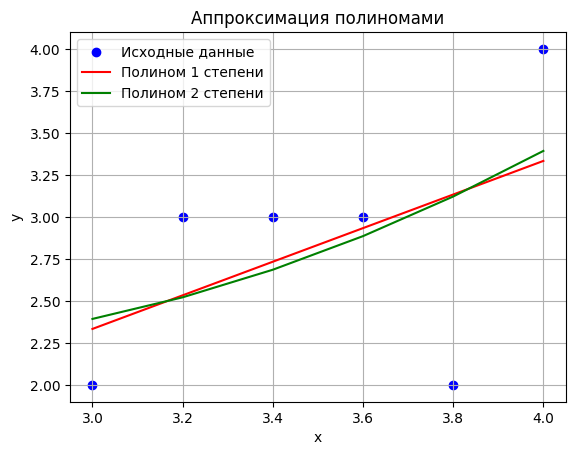

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
x = np.array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y = np.array([2.0, 3.0, 3.0, 3.0, 2.0, 4.0])

# Полином первой степени
p1 = np.poly1d(np.polyfit(x, y, 1))
print("Уравнение полинома первой степени:", p1)

# Полином второй степени
p2 = np.poly1d(np.polyfit(x, y, 2))
print("Уравнение полинома второй степени:", p2)

# Графики
plt.scatter(x, y, color='b', label='Исходные данные')
plt.plot(x, p1(x), color='r', label='Полином 1 степени')
plt.plot(x, p2(x), color='g', label='Полином 2 степени')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация полиномами')
plt.grid()
plt.show()